# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import numpy
from random import shuffle
import random
import sys
import glob

import matplotlib.pyplot as plt
plt.style.use('classic')

import seaborn as sns
sns.set_style('ticks')

# Algunas variables globales

In [2]:
passbands_dict = {'g':'green','r':'red','i':'blue','z':'black'}

sntypes_dict   = {'Ia':1,'II':2,'IIn':21,'IIP':22,'IIL':23,'Ibc':3,
                  'Ib':32,'Ic':33,'NO_SPEC_CONF':-9}

# Funciones

## Información general de un objeto

In [3]:
def create_dict(filename,dbgFlag=False):
    '''
    Reads the first lines of <filename> 
    and returns a dictionary with some 
    information of the object
    
    Inputs: 
        filename: full path of the file to be analyzed
        dbgFlag : flag (optional) to display results
    
    Output:
        dictionary: dictionary containing the info 
                    of the first lines of <filename>
    '''      
        
    file  = open(filename)
    lines = file.readlines()
    dictionary = {}
    
    if dbgFlag == True:
        print('processing:',filename)
        
    #loop over the first 15 lines
    for nl in range(15):
        lines[nl] = lines[nl].strip().split(':')
        key       = lines[nl][0]
    
        if key =='':
            continue        
        #string values
        if key in ['SURVEY','IAUC','FILTERS']: 
            val = lines[nl][1].strip()
        #integer values
        if key in ['SNID','SNTYPE','FAKE','HOST_GALAXY_GALID']:
            val = int(lines[nl][1].strip().split()[0])
        #float values
        if key in ['RA','DECL','MWEBV']:
            val = float(lines[nl][1].strip().split()[0])
        #tuples of two floats
        if key in ['REDSHIFT_SPEC','HOST_GALAXY_PHOTO-Z']:
            val = (float(lines[nl][1].strip().split()[0]),float(lines[nl][1].strip().split()[2]))
        
        dictionary[key] = val
    
    if dbgFlag == True:
        print(dictionary)
    
    return dictionary

In [7]:
#sample = '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN124458.DAT'
sample = u'C:\\Users\\52811\\cosas_python\\Python3\\raw.githubusercontent.com\\DES_BLIND+HOSTZ\\DES_SN124458.DAT'

create_dict(sample)

{'SURVEY': 'DES',
 'SNID': 124458,
 'IAUC': 'UNKNOWN',
 'SNTYPE': 1,
 'FILTERS': 'griz',
 'RA': 36.75,
 'DECL': -4.5,
 'FAKE': 3,
 'MWEBV': 0.0283,
 'REDSHIFT_SPEC': (0.4138, 0.005),
 'HOST_GALAXY_GALID': 13154,
 'HOST_GALAXY_PHOTO-Z': (0.3959, 0.0238)}

## Curvas de luz

In [8]:
def create_df(filename):
    '''
    Reads the time series in <filename> and organizes 
    this information in a pandas dataframe
    
    Inputs:
        filename: full path of the file to be analyzed
    
    Output: 
        df: dataframe containing the information of
            the time, filters, flux, and fluxerr 
    '''  
    
    df = pd.read_csv(filename,sep='\s+',skiprows=22)
    
    #first we remove 'DETECTION' and 'END' from the 'VARLIST:' column
    df = df[(df['VARLIST:']!='END:')&(df['VARLIST:']!='DETECTION:')]
    
    #we remove the 'VARLIST:' column
    df.drop(['VARLIST:'],axis=1,inplace=True)
    
    #convert values to float (if not, FLUXCAL & FLUXCALERR would be str!)
    df[['MJD','FLUXCAL','FLUXCALERR']] = df[['MJD','FLUXCAL','FLUXCALERR']].astype(float)
    
    #time in days since the first observation
    #see Charnock & Moss 1606.07442
    df['T-Ti']=df['MJD']-df['MJD'].min()
        
    return df

In [9]:
#sample = '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN124458.DAT'
sample = u'C:\\Users\\52811\\cosas_python\\Python3\\raw.githubusercontent.com\\DES_BLIND+HOSTZ\\DES_SN124458.DAT'

df = create_df(sample)
df

,MJD,FLT,FIELD,FLUXCAL,FLUXCALERR,T-Ti
0,56274.188,g,NaN,-1.368,3.586,0.000
1,56274.195,r,NaN,29.830,2.811,0.007
2,56274.203,i,NaN,28.370,4.306,0.015
3,56274.219,z,NaN,25.700,5.038,0.031
4,56282.203,g,NaN,123.700,6.949,8.015
5,56283.156,r,NaN,203.700,5.023,8.968
6,56283.168,i,NaN,142.100,5.744,8.980
7,56283.184,z,NaN,136.400,4.851,8.996
9,56288.191,g,NaN,226.200,13.390,14.003
10,56289.066,r,NaN,310.400,7.735,14.878


Acceso a una banda en específico

In [10]:
df[df['FLT']=='z']

,MJD,FLT,FIELD,FLUXCAL,FLUXCALERR,T-Ti
3,56274.219,z,NaN,25.70,5.038,0.031
7,56283.184,z,NaN,136.40,4.851,8.996
12,56289.086,z,NaN,169.40,6.468,14.898
16,56298.055,z,NaN,165.30,5.046,23.867
20,56306.121,z,NaN,114.70,5.814,31.933
24,56318.086,z,NaN,89.78,6.595,43.898
28,56327.055,z,NaN,76.42,4.974,52.867
32,56337.043,z,NaN,51.71,4.162,62.855
36,56348.008,z,NaN,24.14,6.581,73.820


## Lista de objetos

In [8]:
def object_information(file_list):
    '''
    Reads a list of files and returns a dictionary whose
    keys are SNID and the values are tuples
    (filename,spec_flag,dict,df)
    
    Input:
        file_list: list of files to be analyzed
                   (spec confirmation is assumed)
        
    Output:
        lc_dict: dictionary whose keys are SNID and
                 values are (filemane,spec_conf,dict,df), where 
                 filename is the full path of the file to
                 be analyzed, spec_flag is a flag indicating
                 whether spec confirmation is available (1)
                 or not (0), dict is a dictionary containing
                 general info of the object (see create_dict), 
                 and df is the dataframe with the time series 
                 for all the passbands (see create_df)
    '''   
    
    lc_dict = {}
    
    for file in file_list:
        temp_dict = create_dict(file)
        temp_snid = temp_dict['SNID']
        #temp_z    = temp_dict['HOST_GALAXY_PHOTO-Z'][0]
        temp_type = temp_dict['SNTYPE']
        temp_df   = create_df(file)
        
        #time convertion to rest frame
        #note that host_z is not enough accurate to convert
        #to rest frame. Also, some considerations about 
        #k-correction are needed to proceed further
        #temp_df['Tres'] = temp_df['T-Ti']/(1+temp_z)
        
        #flag of spectroscopical confirmation
        if temp_type == -9:
            spec_flag = 0
        else:
            spec_flag = 1                
            
        lc_dict[temp_snid] = (file,spec_flag,temp_dict,temp_df)
        
    return lc_dict

In [9]:
host_files  = glob.glob("/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/*.DAT")

In [10]:
lc_dict = object_information(host_files)

In [11]:
len(lc_dict)

18321

In [12]:
lc_dict[124458]

('/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN124458.DAT',
 1,
 {'SURVEY': 'DES',
  'SNID': 124458,
  'IAUC': 'UNKNOWN',
  'SNTYPE': 1,
  'FILTERS': 'griz',
  'RA': 36.75,
  'DECL': -4.5,
  'FAKE': 3,
  'MWEBV': 0.0283,
  'REDSHIFT_SPEC': (0.4138, 0.005),
  'HOST_GALAXY_GALID': 13154,
  'HOST_GALAXY_PHOTO-Z': (0.3959, 0.0238)},
           MJD FLT FIELD  FLUXCAL  FLUXCALERR    T-Ti
 0   56274.188   g   NaN   -1.368       3.586   0.000
 1   56274.195   r   NaN   29.830       2.811   0.007
 2   56274.203   i   NaN   28.370       4.306   0.015
 3   56274.219   z   NaN   25.700       5.038   0.031
 4   56282.203   g   NaN  123.700       6.949   8.015
 5   56283.156   r   NaN  203.700       5.023   8.968
 6   56283.168   i   NaN  142.100       5.744   8.980
 7   56283.184   z   NaN  136.400       4.851   8.996
 9   56288.191   g   NaN  226.200      13.390  14.003
 10  56289.066   r   NaN  310.400       7.735  14.878
 11  56289.078   i   NaN  215.300       9.641  14.890
 12  56289.086 

# Graficación

In [13]:
def create_4x4plot(filenames,title=None,logFlag=False):
    fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(9,8))
        
    for ax,filename in zip(axs.flat,filenames):
        temp_dict = create_dict(filename,logFlag)        
        temp_df   = create_df(filename)
    
        passbands_temp = [flt for flt in temp_dict['FILTERS']]
        tmin = temp_df['T-Ti'].min()-4.
        tmax = temp_df['T-Ti'].max()+5.
        ax.set_title(filename[-16:])
    
        for pb in passbands_temp:
            temp_pb_df = temp_df[temp_df['FLT'] == pb]
            ax.errorbar(temp_pb_df['T-Ti'],temp_pb_df['FLUXCAL'],yerr=temp_pb_df['FLUXCALERR'],
                        color=passbands_dict[pb],linestyle='',marker='o',markersize=5,
                        label=pb+': '+str(len(temp_pb_df)))
            ax.set_xlim([tmin,tmax])
            ax.set_xlabel('$T-T_i$')
            ax.set_ylabel('$flux$')
            ax.legend(loc='best',prop={'size':8})

    if title is not None:
        fig.suptitle(title)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    else:
        plt.tight_layout()
        
    return

## High-quality light curves 

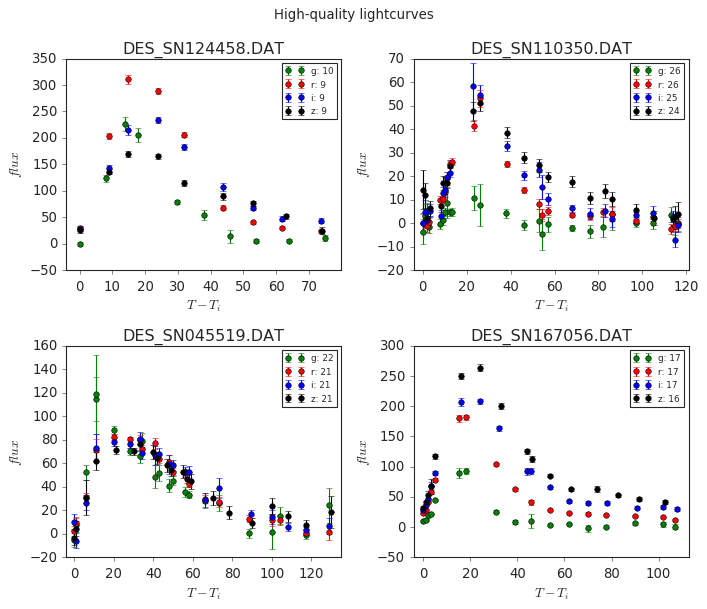

In [14]:
examples = ['/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN124458.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN110350.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN045519.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN167056.DAT']

create_4x4plot(examples,'High-quality lightcurves')

## Random sample

processing: /home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN175461.DAT
{'SURVEY': 'DES', 'SNID': 175461, 'IAUC': 'UNKNOWN', 'SNTYPE': -9, 'FILTERS': 'griz', 'RA': 34.5, 'DECL': -5.5, 'FAKE': 3, 'MWEBV': 0.0227, 'REDSHIFT_SPEC': (-9.0, 9.0), 'HOST_GALAXY_GALID': 19410, 'HOST_GALAXY_PHOTO-Z': (0.9252, 0.0183)}
processing: /home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN044744.DAT
{'SURVEY': 'DES', 'SNID': 44744, 'IAUC': 'UNKNOWN', 'SNTYPE': -9, 'FILTERS': 'griz', 'RA': 0.5, 'DECL': -43.0, 'FAKE': 3, 'MWEBV': 0.0111, 'REDSHIFT_SPEC': (-9.0, 9.0), 'HOST_GALAXY_GALID': 18832, 'HOST_GALAXY_PHOTO-Z': (0.8603, 0.0306)}
processing: /home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN112002.DAT
{'SURVEY': 'DES', 'SNID': 112002, 'IAUC': 'UNKNOWN', 'SNTYPE': -9, 'FILTERS': 'griz', 'RA': 52.5, 'DECL': -27.5, 'FAKE': 3, 'MWEBV': 0.0097, 'REDSHIFT_SPEC': (-9.0, 9.0), 'HOST_GALAXY_GALID': 12280, 'HOST_GALAXY_PHOTO-Z': (0.6861, 0.0249)}
processing: /home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_

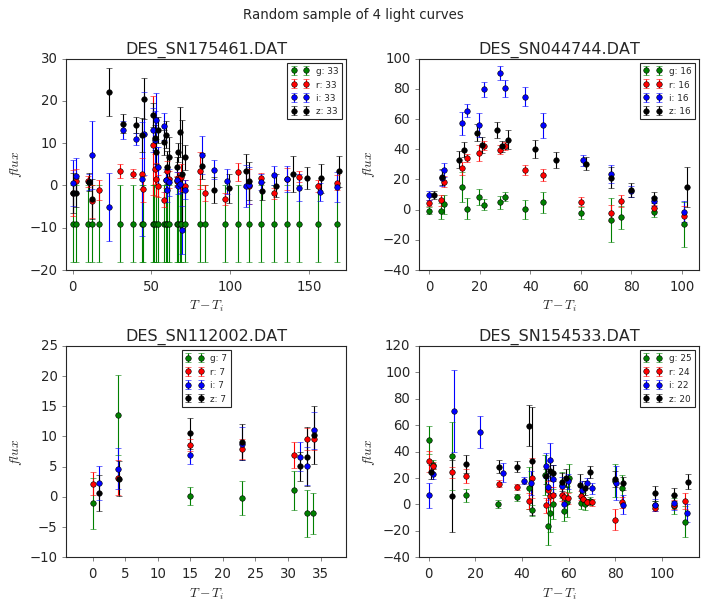

In [15]:
#we select a random sample of four files (without replacement)
idx_samples = random.sample(range(0,len(host_files)),4)
samples     = [host_files[idx] for idx in idx_samples]

create_4x4plot(samples,'Random sample of 4 light curves',True)

## Number of points in each band. 
The number of points in each passband can be different, so there are timesteps where there is no information on some passband in particular.

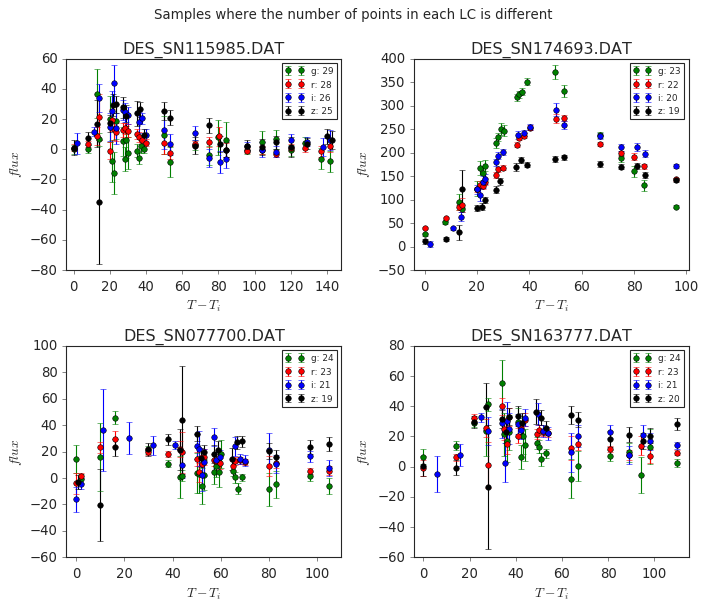

In [16]:
examples = ['/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN115985.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN174693.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN077700.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN163777.DAT']

create_4x4plot(examples,'Samples where the number of points in each LC is different')

There are samples with too few points

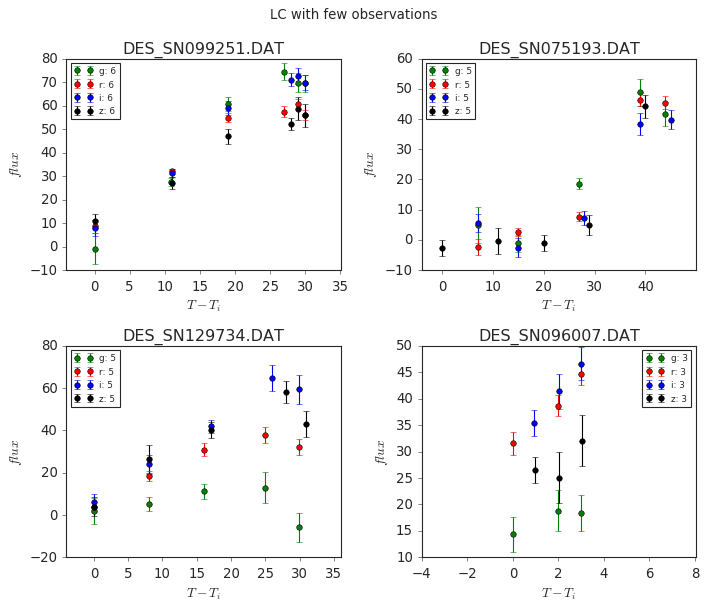

In [17]:
examples = ['/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN099251.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN075193.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN129734.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN096007.DAT']

create_4x4plot(examples,'LC with few observations')

##  Flux in bands
The intensity of the peak of the light curves can vary from band to band

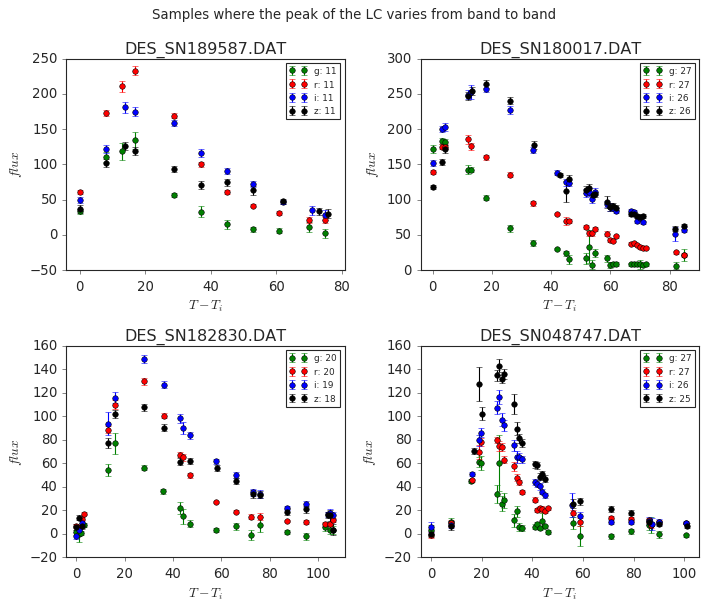

In [18]:
examples = ['/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN189587.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN180017.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN182830.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN048747.DAT']

create_4x4plot(examples,'Samples where the peak of the LC varies from band to band')

There are samples where the flux in one band does not vary. See Kessler R. et al., PASP, 122, 1415 (2010) for an explanation

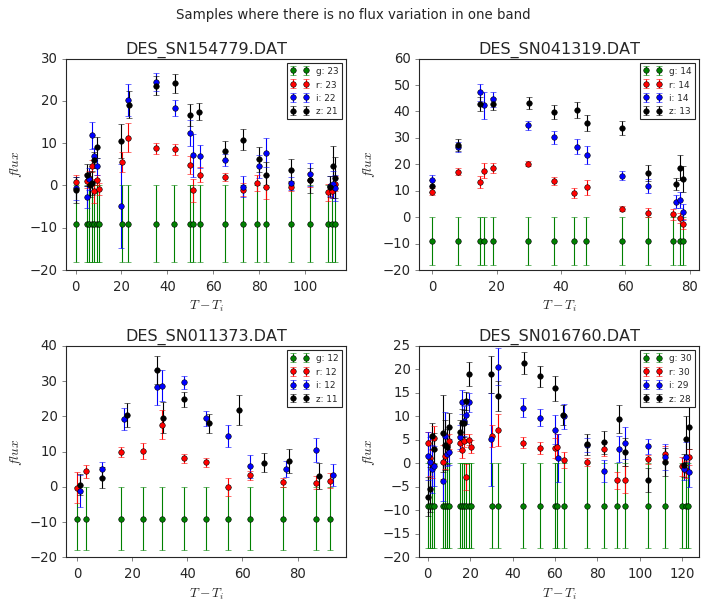

In [19]:
examples = ['/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN154779.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN041319.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN011373.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN016760.DAT']

create_4x4plot(examples,'Samples where there is no flux variation in one band')

There are samples where there is no peak for all bands. In these cases, the observation window in the simulations missed/anticipated the explosion of the SN. See the STACCATO paper: Revsbech et al, MNRAS 473, 3969 (2018) for an explanation. 

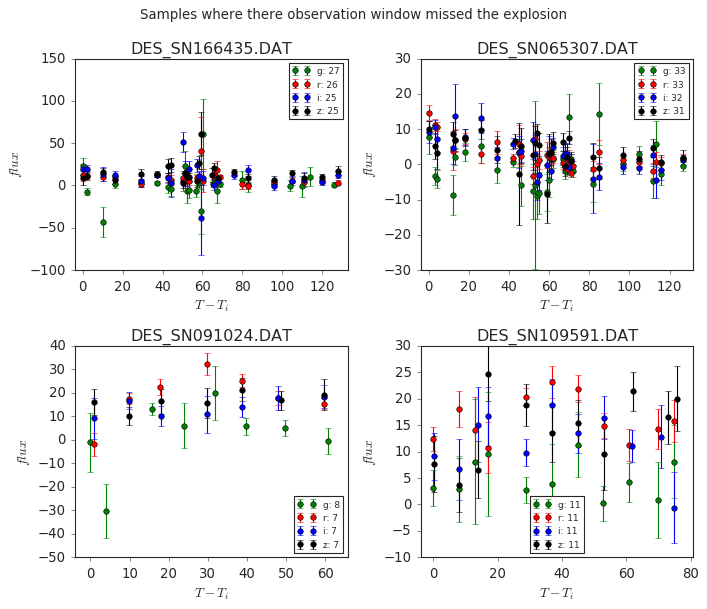

In [20]:
examples = ['/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN166435.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN065307.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN091024.DAT',
            '/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN109591.DAT']

create_4x4plot(examples,'Samples where there observation window missed the explosion')

# Solución (disponible al finalizar el challenge)

In [21]:
def read_keys(filename):
    '''
    Reads the answer keys in <filename> and returns a 
    pandas data frame with the full information. Note that
    GENTYPE is the answer label and SNTYPE is the label
    provided in the blind dataset (SNTYPE)
    
    Input:
        filename: full path of the answer keys file
        
    Output:
        df: pandas dataframe with the full information
            in the file
    '''
    
    df = pd.read_csv(filename,sep='\s+',skiprows=1)
    
    #remove 'VARNAMES:' and 'NVAR:' from the 'VARNAMES:' column
    df = df[(df['VARNAMES:']!='VARNAMES:')&(df['VARNAMES:']!='NVAR:')]

    #remove the first column & reset index   
    df.drop(columns=['VARNAMES:'],inplace=True)    
    df.reset_index(drop=True,inplace=True)    
       
    #rename 'CID' as 'SNID'
    df.rename(columns={'CID':'SNID'},inplace=True)
    
    #convert strings to integer & float accordingly 
    for (columnName,columnData) in df.iteritems():
        if columnName in ['SNID','GENTYPE','SNTYPE','LIBID','NOBS']:
            df[columnName] = df[columnName].astype(int)
        else:
            df[columnName] = df[columnName].astype(float)    
        
    return df

In [22]:
answer_keys = '/home/ealmaraz/datasets/spcc/DES_UNBLIND_KEY/DES_UNBLIND+HOSTZ.KEY'
df = read_keys(answer_keys)
df

,SNID,GENTYPE,SNTYPE,GENZ,HOSTZ,HOSTZERR,LIBID,RA,DECL,MWEBV,...,TRESTMAX,TGAPMAX,AV,RV,DELTA,S2alpha,S2beta,S2x0,S2x1,S2c
0,101953,3,-9,0.70257,0.64937,0.0329,0,52.50,-27.5,0.009659,...,49.4360,7.0504,0.000000,2.1795,-9.000000,-9.0,-9.0,-9.0,-9.0,-9.0
1,57351,3,-9,0.60522,0.59962,0.0257,1,34.50,-5.5,0.022713,...,59.7560,6.2248,0.000000,2.1796,-9.000000,-9.0,-9.0,-9.0,-9.0,-9.0
2,31158,3,-9,0.79850,0.79610,0.0232,0,52.50,-27.5,0.009659,...,62.4720,6.6744,0.000000,2.1794,-9.000000,-9.0,-9.0,-9.0,-9.0,-9.0
3,93856,3,-9,0.34034,0.31094,0.0319,2,36.75,-4.5,0.028275,...,36.1120,7.4258,0.000000,2.1797,-9.000000,-9.0,-9.0,-9.0,-9.0,-9.0
4,166127,3,-9,0.72761,0.68941,0.0394,0,52.50,-27.5,0.009659,...,6.2451,6.3084,0.000000,2.1796,-9.000000,-9.0,-9.0,-9.0,-9.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19751,135216,1,-9,0.80546,0.80246,0.0139,0,52.50,-27.5,0.009659,...,68.7610,6.6487,0.099597,2.3291,-0.083656,-9.0,-9.0,-9.0,-9.0,-9.0
19752,105693,1,-9,0.83539,0.82149,0.0192,1,34.50,-5.5,0.022713,...,6.4360,5.4208,0.080170,2.3060,0.149760,-9.0,-9.0,-9.0,-9.0,-9.0
19753,118986,1,-9,0.36586,0.35556,0.0326,2,36.75,-4.5,0.028275,...,-6.4949,7.2871,0.102310,2.5292,-0.398900,-9.0,-9.0,-9.0,-9.0,-9.0
19754,180165,1,-9,0.87929,0.89309,0.0391,3,48.00,0.0,0.071266,...,32.7460,7.3769,0.259520,1.9845,-0.016968,-9.0,-9.0,-9.0,-9.0,-9.0


In [23]:
df.columns

Index(['SNID', 'GENTYPE', 'SNTYPE', 'GENZ', 'HOSTZ', 'HOSTZERR', 'LIBID', 'RA',
       'DECL', 'MWEBV', 'MU', 'MJD0', 'MAGT0_g', 'MAGT0_r', 'MAGT0_i',
       'MAGT0_z', 'SNRMAX_g', 'SNRMAX_r', 'SNRMAX_i', 'SNRMAX_z', 'SNRMAX',
       'SNRMAX2', 'SNRMAX3', 'TRISE_SHIFT', 'TFALL_SHIFT', 'NOBS', 'TRESTMIN',
       'TRESTMAX', 'TGAPMAX', 'AV', 'RV', 'DELTA', 'S2alpha', 'S2beta', 'S2x0',
       'S2x1', 'S2c'],
      dtype='object')

In [24]:
df[df['SNID']==124458]['NOBS']

15589    37
Name: NOBS, dtype: int64

# Interpolación con kernel gaussiano

In [25]:
def gaussian_kernel_interpolator(df,b,nts=50,nsamples=1):
    '''
    Interpolates the flux on a uniform time grid using 
    a Gaussian kernel smoother. See
    https://en.wikipedia.org/wiki/Kernel_smoother
    
    Inputs:
        df: dataframe with the time series to
            be interpolated
        b : length scale of the kernel
        nts: number of timesteps of the grid
        nsamples: number of realizations for each 
                  passband (it allows us to estimate
                  the std of the interpolated flux)
                  
    Outputs:
        tgrid: array of evenly-spaced timesteps at 
               which the interpolated flux is given
        fgrid_mean_std: dataframe with the mean and 
                        std of the interpolated flux
                        at each timestep
        fgrid_samples: dictionary containing the <nsamples>
                       realizations of the interpolated
                       flux; keys are the passbands and
                       values are the realizations. Each
                       realization consists of the 
                       interpolated flux
    '''    
    
    #uniform grid
    tmin,tmax = df['T-Ti'].min(),df['T-Ti'].max()
    tgrid     = np.linspace(tmin,tmax,num=nts,endpoint=True)
    tgrid     = tgrid.reshape(1,len(tgrid))  #reshape to row vector (1,nts)       
        
    #Gaussian kernel smoother
    #fgrid_mean_std contains the mean interpolated flux & error for each 
    #passband. 
    #rows denote passbands; columns denote the flux at each timestep 
    fgrid_mean_std = pd.DataFrame(columns=['f(t_'+str(i)+')' for i in range(0,tgrid.shape[1])])

    #loop over the passbands
    passbands = np.sort(df['FLT'].unique())
    groups    = df.groupby('FLT')

    #in this dictionary we collect the <nsamples> random realizations
    #of the interpolated flux for each passband. key is the passband
    fgrid_samples    = {}
    
    for pb in passbands:
        pb_df    = groups.get_group(pb)
        #reshape to column vector (nobs,1)
        pb_tobs  = pb_df['T-Ti'].values.reshape(len(pb_df),1)  
        #shape (nobs,nts) after broadcasting
        pb_delta = tgrid - pb_tobs
        #Gaussian kernel smoother                         
        pb_gks   = np.exp(-pb_delta**2/(2*b**2)) 
        #sum over observation points (rows); shape (nts,) after sum
        pb_weights = np.sum(pb_gks,axis=0)
        #mean and sigma (a gaussian distribution is assumed) around each flux point
        #pb_fgrid_samples collects the random realizations of the interpolated flux 
        #for a single passband
        pb_mu,pb_sigma   = pb_df['FLUXCAL'].values,pb_df['FLUXCALERR'].values
        pb_fgrid_samples = np.zeros((nsamples,tgrid.shape[1]))
        
        for ns in range(0,nsamples):
            #reshape to column vector (nobs,1)
            pb_fobs_sample = np.random.normal(loc=pb_mu,scale=pb_sigma,
                                              size=[1,len(pb_mu)]).reshape((len(pb_mu),1))
            #weighted sum (not a matrix multiplication!)
            #shape (nobs,nts) after broadcasting 
            pb_wsum    = pb_gks*pb_fobs_sample
            #sum over observation points (rows); shape (nts,) after sum
            pb_wsum    = np.sum(pb_wsum,axis=0)
            #interpolated flux on the uniform grid
            pb_fgrid_sample = pb_wsum/pb_weights
            #we stack the results from each realization
            pb_fgrid_samples[ns,:] = pb_fgrid_sample 

        #we collect all realizations for the given passband
        fgrid_samples[pb] = pb_fgrid_samples
                           
        #mean & std of the interpolated flux accross all realizations
        pb_fgrid     = np.mean(pb_fgrid_samples,axis=0)
        pb_fgrid_err = np.std(pb_fgrid_samples,axis=0)      
        fgrid_mean_std.loc[pb]        = pb_fgrid
        fgrid_mean_std.loc[pb+'_err'] = pb_fgrid_err
    
    #convert 'tgrid' to a simple numpy array
    tgrid = np.array(tgrid.flat)
    
    return tgrid,fgrid_mean_std,fgrid_samples

In [28]:
host_files  = glob.glob("/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/*.DAT")
#random sample
#sample      = random.choice(host_files)
#specific sample
sample      = "/home/ealmaraz/datasets/spcc/DES_BLIND+HOSTZ/DES_SN124458.DAT"
sample_df   = create_df(sample)
sample_dict = create_dict(sample)
sample_snid = sample_dict['SNID']
print('sample: ',sample_snid)
sample_df.head(5)

sample:  124458


,MJD,FLT,FIELD,FLUXCAL,FLUXCALERR,T-Ti
0,56274.188,g,NaN,-1.368,3.586,0.000
1,56274.195,r,NaN,29.830,2.811,0.007
2,56274.203,i,NaN,28.370,4.306,0.015
3,56274.219,z,NaN,25.700,5.038,0.031
4,56282.203,g,NaN,123.700,6.949,8.015


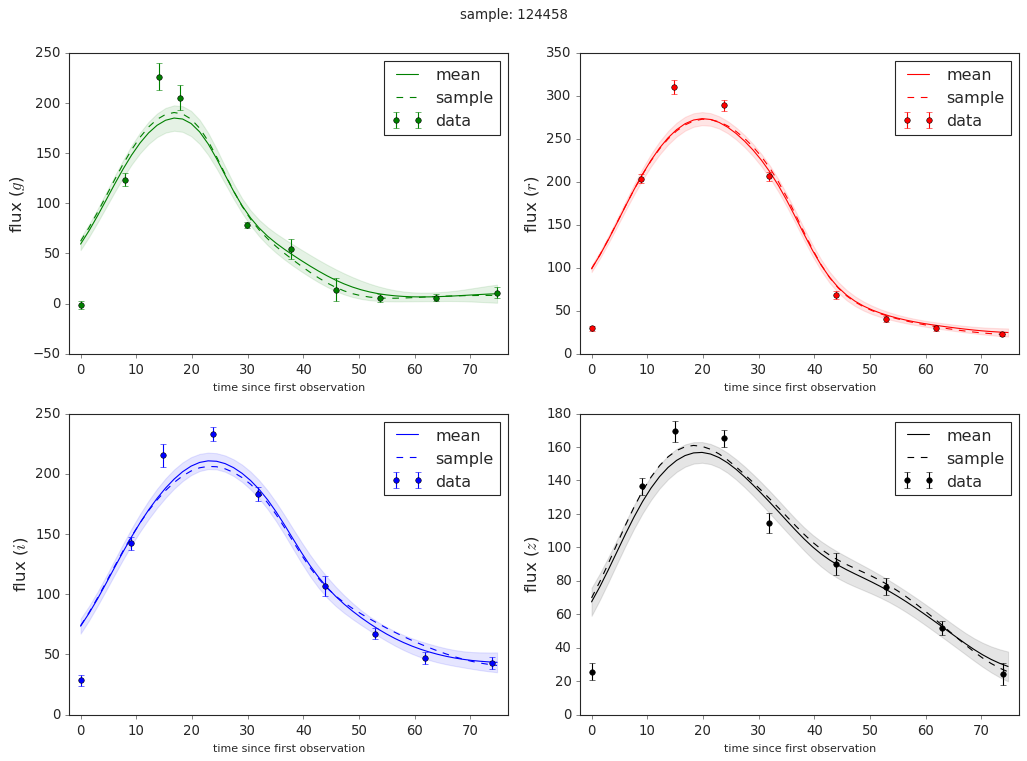

In [30]:
tgrid,fgrid_mean_std,fgrid_samples = gaussian_kernel_interpolator(sample_df,b=7,nts=50,nsamples=50)

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(13,10))
fig.suptitle('sample: {}'.format(sample_snid))

sample_groups    = sample_df.groupby('FLT')

for pb in passbands_dict.keys():
    idx       = list(passbands_dict.keys()).index(pb)
    sample_pb = sample_groups.get_group(pb) 

    #data
    axs.flat[idx].errorbar(sample_pb['T-Ti'].values,sample_pb['FLUXCAL'].values,
                           yerr=sample_pb['FLUXCALERR'].values,
                           color=passbands_dict[pb],
                           linestyle='',marker='o',markersize=5,label='data')
    
    #Gaussian kernel smoother: max & min mark the 2\sigma (95%) limits around the mean
    sample_pb_max = fgrid_mean_std.loc[pb].values+2.0000*fgrid_mean_std.loc[pb+'_err'].values
    sample_pb_min = fgrid_mean_std.loc[pb].values-2.0000*fgrid_mean_std.loc[pb+'_err'].values
    axs.flat[idx].fill_between(tgrid,sample_pb_max,sample_pb_min,
                               color=passbands_dict[pb],alpha=0.1)
    
    #mean
    sample_mean  = fgrid_mean_std.loc[pb].values
    axs.flat[idx].plot(tgrid,sample_mean,color=passbands_dict[pb],label='mean')
    
    #example of a generated sample
    sample_example = fgrid_samples[pb][0]
    axs.flat[idx].plot(tgrid,sample_example,color=passbands_dict[pb],label='sample',linestyle='--')
            
    axs.flat[idx].set_xlabel('time since first observation',fontsize=10)
    axs.flat[idx].set_xlim([tgrid.min()-2,tgrid.max()+2])
    axs.flat[idx].set_ylabel('flux (${}$)'.format(pb),fontsize=15)
    #axs.flat[idx].set_ylim([-40,140])    
    axs.flat[idx].legend(loc='best');   
    
#plt.tight_layout()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])